# Load MNIST 

In [13]:
import warnings
warnings.filterwarnings("ignore")


In [14]:
from keras.datasets import mnist
import numpy as np

In [2]:
(x_train,_),(x_test,_) = mnist.load_data()

In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
#Normalization and flatten

x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

x_train = x_train.reshape((len(x_train),np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test),np.prod(x_test.shape[1:])))


print(x_train.shape)
print(x_test.shape)


(60000, 784)
(10000, 784)


# Create an Autoencoder

In [8]:
import keras
from keras import layers

In [15]:
encoding_dim = 32 #size of encoded representation

#input layer
input_img = keras.Input(shape=(784,))
#encoding layer
encoded = layers.Dense(encoding_dim,activation='relu')(input_img)
#decoding layer
decoded = layers.Dense(784,activation='sigmoid')(encoded)

#define the model
autoencoder = keras.Model(input_img,decoded)

In [16]:
#Define separate encoder and decoders

#encoder
encoder = keras.Model(input_img,encoded)

#Decoding model
encoded_input = keras.Input(shape=(encoding_dim,))
decode_layer = autoencoder.layers[-1] #retrieve decoding layer of autoencoder

decoder = keras.Model(encoded_input,decode_layer(encoded_input))

In [17]:
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')

In [18]:
#train for 50 epochs
autoencoder.fit(x_train,x_train,epochs=50,batch_size=256,shuffle=True,validation_data=(x_test,x_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.3887 - val_loss: 0.1860
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1776 - val_loss: 0.1536
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1497 - val_loss: 0.1341
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1318 - val_loss: 0.1213
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1203 - val_loss: 0.1130
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1126 - val_loss: 0.1072
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1073 - val_loss: 0.1028
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1030 - val_loss: 0.0993
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0999 - val_loss: 0.0970
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0980 - val_loss: 0.0955
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0966 - val_loss: 0.0944
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

## viz the results

In [19]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step


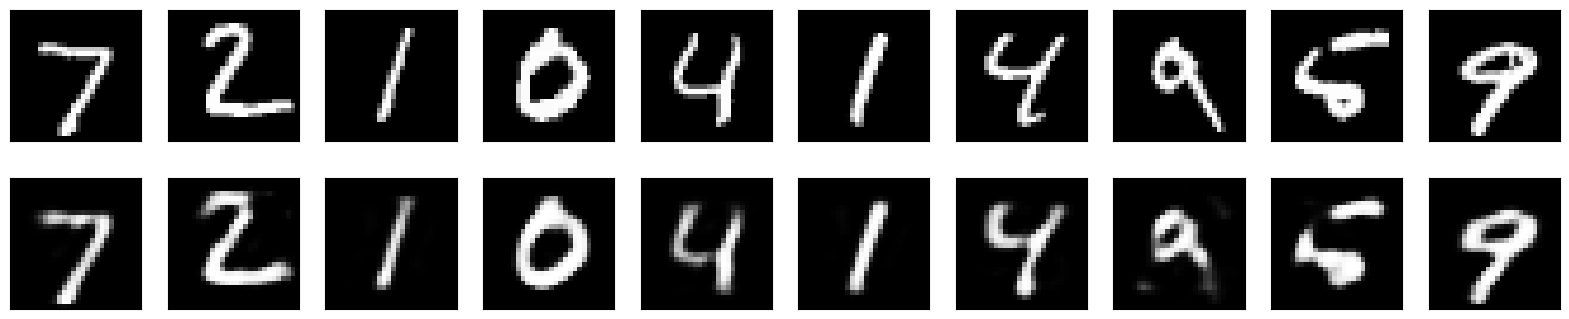

In [20]:
import matplotlib.pyplot as plt

n=10

plt.figure(figsize=(20,4))

for i in range(n):
    # Display original
    ax = plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()

    ax. get_xaxis().set_visible(False)
    ax. get_yaxis().set_visible(False)

    #Display reconstruction
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax. get_xaxis().set_visible(False)
    ax. get_yaxis().set_visible(False)
plt.show()

# Adding Sparsity Constraint

In [27]:
import keras
from keras import layers
from keras import regularizers

encoding_dim = 32

input_img = keras.Input(shape=(784,))

#Encoded layer with L1 regulizer
encoded = layers.Dense(encoding_dim,activation='relu',activity_regularizer = regularizers.l1(10e-9))(input_img)

decoded = layers.Dense(784,activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img,decoded)


In [28]:
#Define separate encoder and decoders

#encoder
encoder = keras.Model(input_img,encoded)

#Decoding model
encoded_input = keras.Input(shape=(encoding_dim,))
decode_layer = autoencoder.layers[-1] #retrieve decoding layer of autoencoder

decoder = keras.Model(encoded_input,decode_layer(encoded_input))

In [29]:
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')

In [30]:
#train for 50 epochs
autoencoder.fit(x_train,x_train,epochs=50,batch_size=256,shuffle=True,validation_data=(x_test,x_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3797 - val_loss: 0.1884
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1787 - val_loss: 0.1525
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1486 - val_loss: 0.1332
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1312 - val_loss: 0.1202
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1189 - val_loss: 0.1115
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1112 - val_loss: 0.1059
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1061 - val_loss: 0.1019
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1024 - val_loss: 0.0990
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0995 - val_loss: 0.0971
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0979 - val_loss: 0.0957
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0967 - val_loss: 0.0948
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

## Viz results

In [31]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step


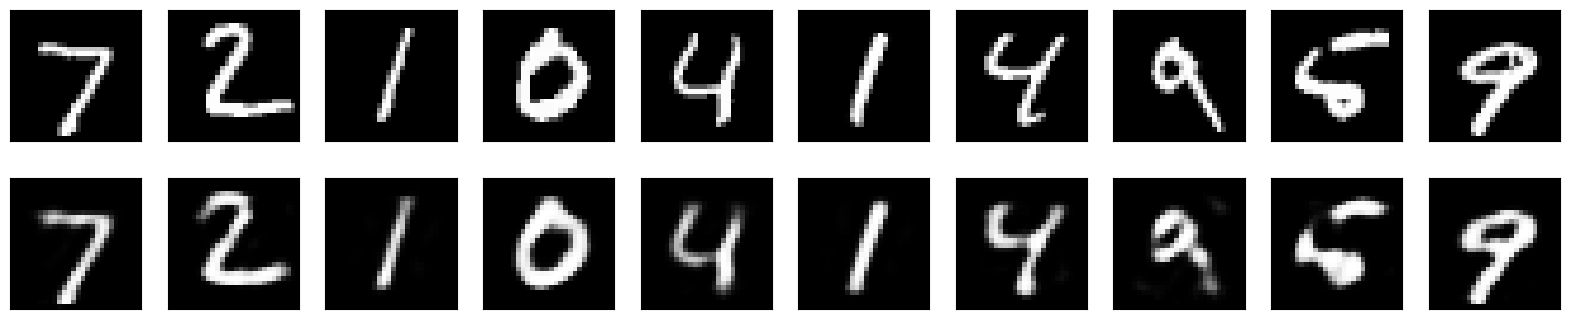

In [32]:
import matplotlib.pyplot as plt

n=10

plt.figure(figsize=(20,4))

for i in range(n):
    # Display original
    ax = plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()

    ax. get_xaxis().set_visible(False)
    ax. get_yaxis().set_visible(False)

    #Display reconstruction
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax. get_xaxis().set_visible(False)
    ax. get_yaxis().set_visible(False)
plt.show()

# Deep Autoencoder

In [33]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128,activation='relu')(input_img)
encoded = layers.Dense(64,activation='relu')(encoded)
encoded = layers.Dense(32,activation='relu')(encoded)

decoded = layers.Dense(64,activation='relu')(encoded)
decoded = layers.Dense(128,activation='relu')(decoded)
decoded = layers.Dense(784,activation='sigmoid')(decoded)

autoencoder = keras.Model(input_img,decoded)

In [34]:
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')

In [35]:
autoencoder.fit(x_train,x_train,epochs=100,batch_size=256,shuffle=True,validation_data=(x_test,x_test))

Epoch 1/100


2024-09-23 14:21:45.950597: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_245', 28 bytes spill stores, 32 bytes spill loads

2024-09-23 14:21:46.873932: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_252', 368 bytes spill stores, 368 bytes spill loads

2024-09-23 14:21:47.348439: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_252', 372 bytes spill stores, 372 bytes spill loads

2024-09-23 14:21:47.682613: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_564', 116 bytes spill stores, 116 bytes spill loads



214/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3472

2024-09-23 14:21:53.068938: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_252', 92 bytes spill stores, 92 bytes spill loads



235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - loss: 0.3379 - val_loss: 0.1648
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1554 - val_loss: 0.1372
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1347 - val_loss: 0.1241
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1227 - val_loss: 0.1156
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1158 - val_loss: 0.1109
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1112 - val_loss: 0.1069
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1074 - val_loss: 0.1040
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1048 - val_loss: 0.1025
Epoch 9/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1028 - val_loss: 0.1004
Epoch 10/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1014 - val_loss: 0.0990
Epoch 11/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0999 - val_loss: 0.0977
Epoch 12/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/st

## Viz

In [38]:
def showcomp():
    encoded_imgs = encoder.predict(x_test)
    decoded_imgs = decoder.predict(encoded_imgs)
    import matplotlib.pyplot as plt
    
    n=10
    
    plt.figure(figsize=(20,4))
    
    for i in range(n):
        # Display original
        ax = plt.subplot(2,n,i+1)
        plt.imshow(x_test[i].reshape(28,28))
        plt.gray()
    
        ax. get_xaxis().set_visible(False)
        ax. get_yaxis().set_visible(False)
    
        #Display reconstruction
        ax = plt.subplot(2,n,i+1+n)
        plt.imshow(decoded_imgs[i].reshape(28,28))
        plt.gray()
        ax. get_xaxis().set_visible(False)
        ax. get_yaxis().set_visible(False)
    plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step


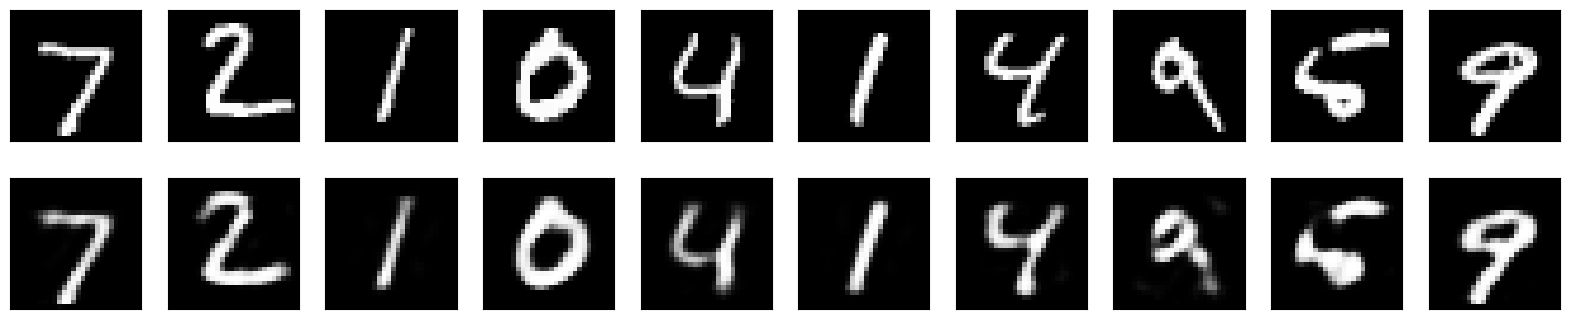

In [39]:
showcomp()

# Convolutional Autoencoder

## Original MNIST data

In [40]:
from keras.datasets import mnist
import numpy as np

In [42]:
(x_train,_),(x_test,_) = mnist.load_data()

In [45]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [46]:
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

x_train = np.reshape(x_train,(len(x_train),28,28,1))
x_test = np.reshape(x_test,(len(x_test),28,28,1))

print(x_train.shape)
print(x_test.shape)



(60000, 28, 28, 1)
(10000, 28, 28, 1)


## build and training

In [86]:
input_img = keras.Input(shape=(28,28,1))
x = layers.Conv2D(16,(3,3),activation='relu',padding='same')(input_img)
x = layers.MaxPooling2D((2,2),padding = 'same')(x)
x = layers.Conv2D(8,(3,3),activation='relu',padding='same')(x)
x = layers.MaxPooling2D((2,2),padding = 'same')(x)
x = layers.Conv2D(8,(3,3),activation='relu',padding='same')(x)
encoded = layers.MaxPooling2D((2,2),padding = 'same')(x)
encoder = keras.Model(input_img,encoded)

#here representation is (4,4,8)
decoder_input = keras.Input(shape=(4,4,8))
x = layers.Conv2D(8,(3,3),activation='relu',padding='same')(decoder_input)
x = layers.UpSampling2D((2,2))(x)
x = layers.Conv2D(8,(3,3),activation='relu',padding='same')(x)
x = layers.UpSampling2D((2,2))(x)
x = layers.Conv2D(16,(3,3),activation='relu')(x)
x = layers.UpSampling2D((2,2))(x)
decoded = layers.Conv2D(1,(3,3),activation='sigmoid',padding='same')(x)
decoder = keras.Model(decoder_input,decoded)

autoencoder = keras.Model(input_img,decoder(encoder(input_img)))
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')


run this in cmd "tensorboard --logdir=/tmp/autoencoder"

In [87]:
from keras.callbacks import TensorBoard

In [88]:
autoencoder.fit(x_train,x_train,epochs=50,batch_size=128,shuffle=True,validation_data=(x_test,x_test),
               callbacks = [TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.3157 - val_loss: 0.1441
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1380 - val_loss: 0.1241
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1227 - val_loss: 0.1162
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1163 - val_loss: 0.1118
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1122 - val_loss: 0.1089
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1096 - val_loss: 0.1065
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1075 - val_loss: 0.1050
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1058 - val_loss: 0.1039
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1047 - val_loss: 0.1029
Epoch 10/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1037 - val_loss: 0.1022
Epoch 11/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1027 - val_loss: 0.1013
Epoch 12/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

## viz

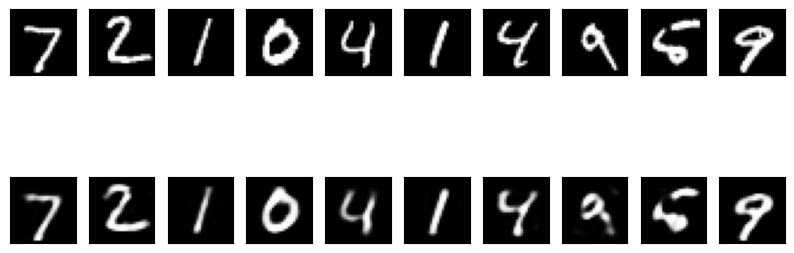

In [89]:
import matplotlib.pyplot as plt

# Assuming x_test and decoded_imgs are defined
n = 10  # Number of images to display

plt.figure(figsize=(10, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


## lets see encoded represenration

In [90]:
encoded_imgs = encoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


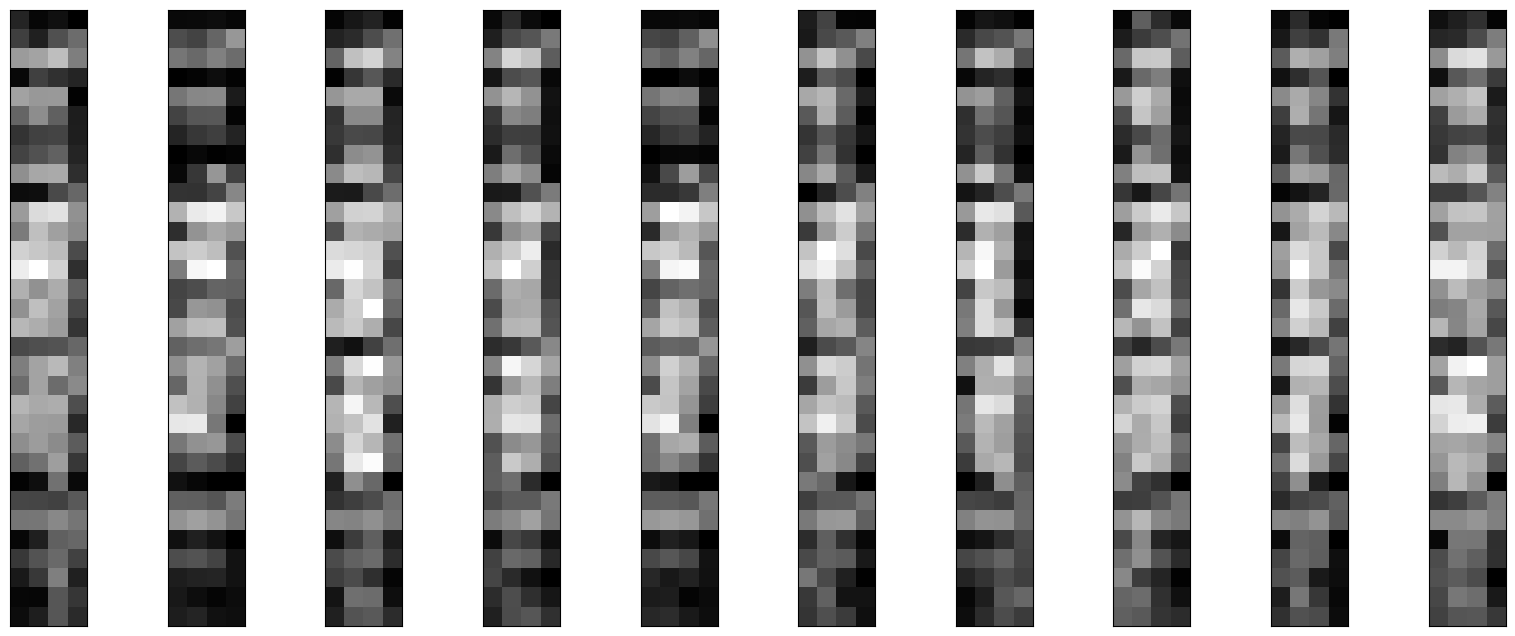

In [100]:
n = 10  # Number of images to display

plt.figure(figsize=(20, 8))
for i in range(1,n+1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape((4,4*8)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Lets decode them

In [101]:
decoded_imgs = decoder.predict(encoded_imgs)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


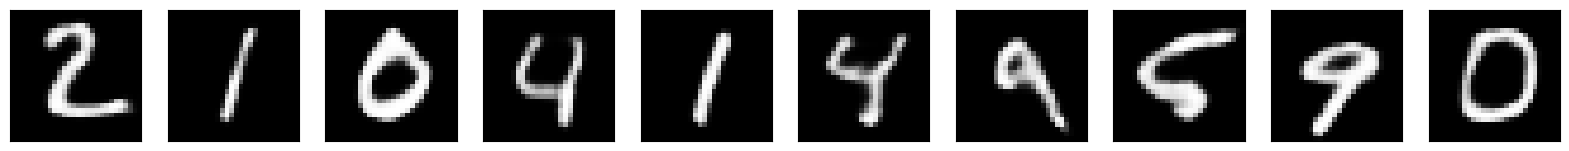

In [103]:
n = 10  # Number of images to display

plt.figure(figsize=(20, 8))
for i in range(1,n+1):
    ax = plt.subplot(1, n, i)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Image Denoising

In [104]:
from keras.datasets import mnist
import numpy as np

In [107]:
(x_train,_),(x_test,_) = mnist.load_data()

x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

x_train = np.reshape(x_train,(len(x_train),28,28,1))
x_test = np.reshape(x_test,(len(x_test),28,28,1))

noise_factor = 0.5
x_train_noisy = x_train+noise_factor*np.random.normal(loc=0.0,scale=1.0,size=x_train.shape)
x_test_noisy = x_test+noise_factor*np.random.normal(loc=0.0,scale=1.0,size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy,0. , 1.)
x_test_noisy = np.clip(x_test_noisy,0.,1.)


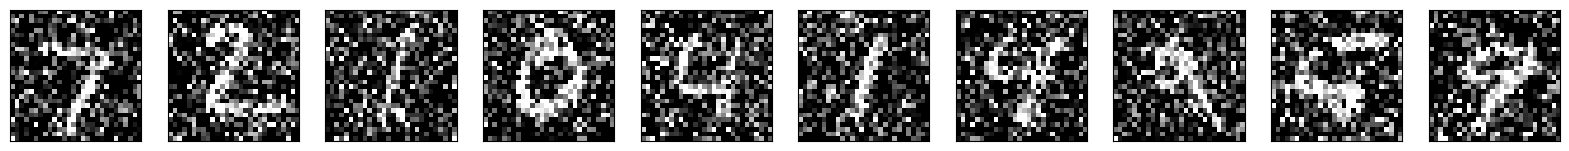

In [108]:
import numpy as np
import matplotlib.pyplot as plt

n = 10  # Number of images to display
plt.figure(figsize=(20, 2))  # Set figure size

for i in range(n):  # Loop from 0 to n-1
    ax = plt.subplot(1, n, i + 1)  # Create a subplot in 1 row and n columns
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')  # Display the noisy image
    ax.get_xaxis().set_visible(False)  # Hide x-axis
    ax.get_yaxis().set_visible(False)  # Hide y-axis

plt.show()  # Show the figure


### Define model

In [112]:
input_img = keras.Input(shape=(28,28,1))
x = layers.Conv2D(32,(3,3),activation='relu',padding = 'same')(input_img)
x = layers.MaxPool2D((2,2),padding='same')(x)
x = layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
encoded = layers.MaxPooling2D((2,2),padding='same')(x)
#here ip is (7,7,32)
x = layers.Conv2D(32,(3,3),activation='relu',padding = 'same')(encoded)
x = layers.UpSampling2D((2,2))(x)
x = layers.Conv2D(32,(3,3),activation='relu',padding = 'same')(x)
x = layers.UpSampling2D((2,2))(x)
decoded = layers.Conv2D(1,(3,3),activation='sigmoid',padding='same')(x)

autoencoder = keras.Model(input_img,decoded)
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')

In [115]:
autoencoder.fit(x_train_noisy,x_train,epochs=20,batch_size=128,shuffle=True,validation_data=(x_test_noisy,x_test),
               callbacks = [TensorBoard(log_dir='/tmp/tb',histogram_freq=0,write_graph=False)])

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0931 - val_loss: 0.0935
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0931 - val_loss: 0.0937
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0932 - val_loss: 0.0933
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0930 - val_loss: 0.0934
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0930 - val_loss: 0.0934
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0930 - val_loss: 0.0934
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0932 - val_loss: 0.0932
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0930 - val_loss: 0.0933
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0930 - val_loss: 0.0932
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0929 - val_loss: 0.0932
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0930 - val_loss: 0.0933
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step

In [116]:
denoised_img = autoencoder.predict(x_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


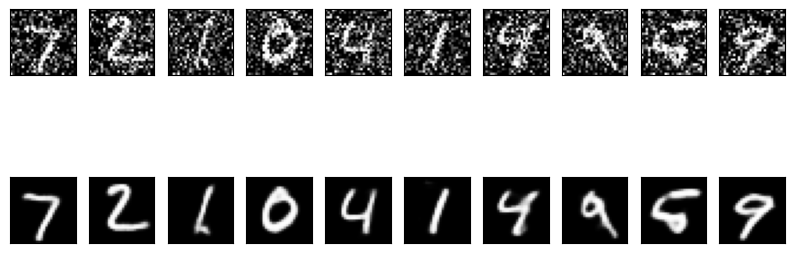

In [117]:
import matplotlib.pyplot as plt

# Assuming x_test and decoded_imgs are defined
n = 10  # Number of images to display

plt.figure(figsize=(10, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(denoised_img[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
